In [0]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas_profiling import ProfileReport


### Prepacion de datos
* Esta fase este involucrada con el preprocesamiento de datos, exploracion y transformacion

In [0]:
data=pd.read_csv(r"https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv",header=None,parse_dates=True)

In [0]:
data=data.astype(str)

In [0]:
for column in data.columns:
    data[column]=data[column].str.replace("'","")

In [0]:
from sklearn.model_selection import train_test_split

In [113]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [0]:
data=data.astype(str)

In [0]:
data=data.replace('nan',np.nan)

In [0]:
data.columns=['age','menopause','tumorsize','inv-nodes','node-caps','deg-malig','breast','breats-squad','irradiat','diagnostic']

In [117]:
data.head()

,age,menopause,tumorsize,inv-nodes,node-caps,deg-malig,breast,breats-squad,irradiat,diagnostic
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [118]:
for column in data.columns:
    print("{0} -> {1}".format(column,data[column].unique()))

age -> ['40-49' '50-59' '60-69' '30-39' '70-79' '20-29']
menopause -> ['premeno' 'ge40' 'lt40']
tumorsize -> ['15-19' '35-39' '30-34' '25-29' '40-44' '10-14' '0-4' '20-24' '45-49'
 '50-54' '5-9']
inv-nodes -> ['0-2' '3-5' '15-17' '6-8' '9-11' '24-26' '12-14']
node-caps -> ['yes' 'no' nan]
deg-malig -> ['3' '1' '2']
breast -> ['right' 'left']
breats-squad -> ['left_up' 'central' 'left_low' 'right_up' 'right_low' nan]
irradiat -> ['no' 'yes']
diagnostic -> ['recurrence-events' 'no-recurrence-events']


In [119]:
data.isnull().sum()

age             0
menopause       0
tumorsize       0
inv-nodes       0
node-caps       8
deg-malig       0
breast          0
breats-squad    1
irradiat        0
diagnostic      0
dtype: int64

In [0]:
#entonces eliminamos los nan, los valores nulos
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent') # al tratrse de categoricas, las rellenamoss con las mas frecuentes
data[['node-caps','breats-squad']]=impute.fit_transform(data[['node-caps','breats-squad']])

In [121]:
data.head()

,age,menopause,tumorsize,inv-nodes,node-caps,deg-malig,breast,breats-squad,irradiat,diagnostic
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [122]:
data.isnull().sum()  

age             0
menopause       0
tumorsize       0
inv-nodes       0
node-caps       0
deg-malig       0
breast          0
breats-squad    0
irradiat        0
diagnostic      0
dtype: int64

* **Limpieza exploracion y seleccion de datos**

In [0]:
#profile=ProfileReport(data,title='Breast-cancer',explorative=True)

In [0]:
#profile.to_widgets() 

In [0]:
#profile.to_file('breast_cancer.html')

In [0]:
data=data.drop_duplicates()

In [127]:
data.shape 

(272, 10)

In [128]:
data.columns 

Index(['age', 'menopause', 'tumorsize', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breats-squad', 'irradiat', 'diagnostic'],
      dtype='object')

In [129]:
pd.value_counts(data['age']).sort_values(axis='index')

20-29     1
70-79     6
30-39    34
60-69    53
40-49    87
50-59    91
Name: age, dtype: int64

In [0]:
percent_ages=(100*data['age'].value_counts().sort_values(axis='index'))/len(data['age'])

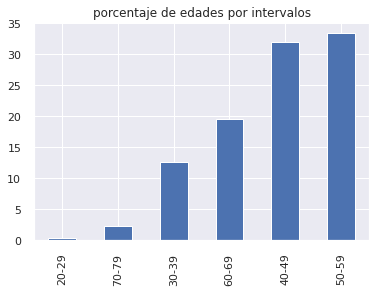

In [134]:
percent_ages.plot(kind='bar',title='porcentaje de edades por intervalos')

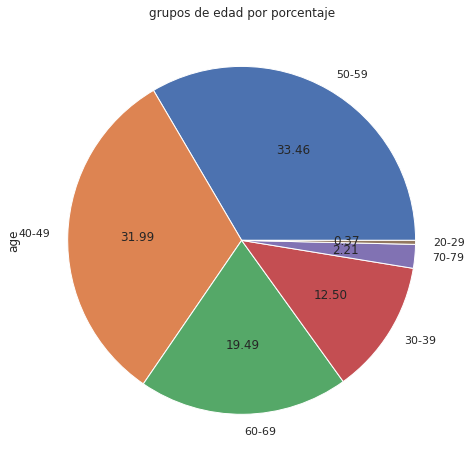

In [133]:
#grafico de edades
data['age'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%.2f',title='grupos de edad por porcentaje')

In [0]:
def visualize_categorical(data):
    fig,axes=plt.subplots(3,3,figsize=(15,15))
    
    for ax,col in zip(axes.flat,data.columns):
        #result=data[col].value_counts().sort_values(axis='index')
        #ax.bar(result.index,result.values)
        #ax.set_title(result.name)
        ##o de forma alternativa podemos hacer
        sns.countplot(data[col],ax=ax)
    plt.show()

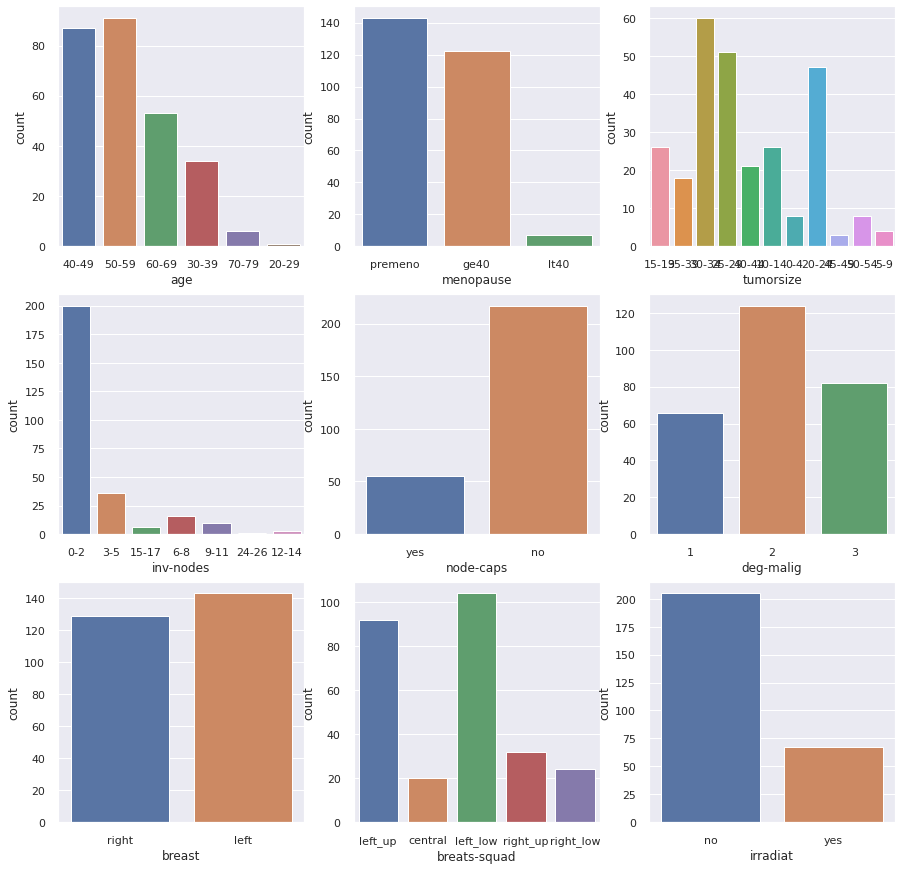

In [132]:
visualize_categorical(data)

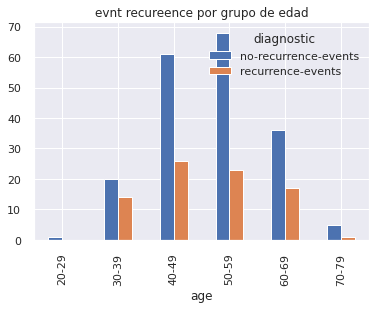

In [135]:
result=pd.crosstab(index=data['age'],columns=data['diagnostic'])
result.plot(kind='bar',title='evnt recureence por grupo de edad')

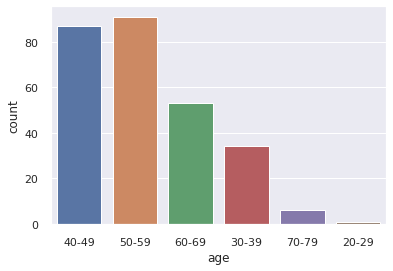

In [131]:
sns.countplot(data['age'])

* Seleccion de caracteristicas.
Se decidio implementar la seleccion de caracteristicas a medida que deseaamos meorar el modelo para educi el sesgo y varianza.
Por lo que lo omitiremos por esta vez, debido a que los algoritmos de de seleccionde caracteristicas son muy escasos en variables categoricas niminales y nominales

In [0]:
#entonces la seleccion de caracteristicas debe de hacerrse con los datos de entrenamiento puesto que los de Test deben ser solo
#para validar el modelo ya finalizado
#Primero hagamos una codificacion sin OneHotEncoder para procesara las caracteristicas
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
#luego separamos los datos


In [0]:
def transform_data(X,y):
    #porque no usar pd.get_dummies() porque no permite generalizar los datos de entrada
    #perparamos datos de entrenda
    #verificamos ordinales
    ordinal_features=['age','menopause','tumorsize','inv-nodes','deg-malig']
    category=[['20-29','30-39','40-49','50-59','60-69','70-79'],
            [ 'lt40','ge40' ,'premeno'],
            ['0-4','5-9','10-14' ,'15-19','20-24','25-29','30-34','35-39','40-44' , '45-49','50-54' ],
            ['0-2' ,'3-5','6-8','9-11','12-14','15-17','24-26' ],
            ['1','2','3']
           ]
    #para binarias (dos valores, sin orden)
    binary_features=['node-caps','breast','irradiat']
    
    #los nominales, pero para fines de seleccion de caracteristicas esta no se consideran mucho
    nominal_features=['breats-squad']
    
    ##O podemos crear un transformador de columnas
    transformer=ColumnTransformer(transformers=[
        ('ordinal',OrdinalEncoder(categories=category),ordinal_features),
        ('nominal',OneHotEncoder(),nominal_features),
        ('binary',OneHotEncoder(drop='first'),binary_features)
    ] ,remainder='passthrough')
        #('binary',LabelEncoder(),binary_features)] ,remainder='passthrough')
    
    transformer.fit(X);
    #mostramos las categorias
        
    X=transformer.transform(X)
    
    #datos de salida
    encoder=LabelEncoder()
    y=encoder.fit_transform(y)
    
    return X,y

In [0]:
X=data.drop('diagnostic',axis=1)
y=data['diagnostic']

In [0]:
X,y=transform_data(X,y)

In [0]:
#escalado de variables
from sklearn.preprocessing import StandardScaler

def scalador(X,y):
    scalador=StandardScaler()
    X=scalador.fit_transform(X)
    y=scalador.fit_transform(y[:,np.newaxis])
    
    return X,y 
    

### seleccion del modelo

* Primero idemtificar cual de los modelos responde de manera natural al problema
* Ajustar sus hiperparametros
* Si para la etapa de validacion el modelo no mejora se vueleven a evaluar los modelos mas representativos

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,cross_validate 
from sklearn.model_selection import StratifiedKFold

In [0]:
models=[('LogisticRegression',LogisticRegression(class_weight='balanced')),
        ('SupportVectorialClassifier',SVC(class_weight='balanced')),
        ('DecisionTreeClassifier',DecisionTreeClassifier(class_weight='balanced')),
        ('RandomForest',RandomForestClassifier(class_weight='balanced'))
       ]

In [0]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,stratify=y)

In [0]:
#ahoa evaluaremos cada modelo segun su rendimiento para el conjunto total de datos
kfold=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)
#guardamos los datos de en una lista
test_score=list()
names=list()
for name,model in models:
    pipe=Pipeline(steps=[
        ('scaler',StandardScaler()),
        ('model',model)
    ])
    score=cross_validate(pipe,
                         X,
                         y,
                         scoring=('f1'),
                         cv=kfold,
                         n_jobs=-1,
                        return_train_score=True)
    print(name)
    print("Train Score: {0} +/- {1}".format(score['train_score'].mean(),score['train_score'].std()))
    print("Test Score: {0} +/- {1}".format(score['test_score'].mean(),score['test_score'].std()))
    test_score.append(score['test_score'].mean())
    names.append(name)

    
    

In [0]:
plt.bar(names,test_score)

* Luego de un determinado numero de iteraciones s determino que los modelos a evaluar son 'Regresion Logistica','Random Forest', 'Supprt Vectorial Machines' m pero en fin si estos no se muestran a la talla evaluaremos el arbol,de decisiones

* **Usaremos 'RandomForest', para ello ajustremos los Hiperparametros**

In [0]:
forest=Pipeline(steps=[('scaler',StandardScaler()),
                       ('forest',RandomForestClassifier(class_weight='balanced'))
                ])

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
grid=GridSearchCV(estimator=forest,
                 param_grid=dict(
                     forest__n_estimators=[100,200,300,400,500],
                     forest__max_depth=np.arange(1,10)
                 ),
                 scoring='f1',
                  cv=kfold,
                  n_jobs=-1
                 )
grid.fit(Xtrain,Ytrain);

In [0]:
grid.best_params_

In [0]:
model=grid.best_estimator_

In [0]:
from sklearn.model_selection import validation_curve

In [0]:
param_range=np.arange(1,10)

train_scores,test_scores=validation_curve(estimator=model,
                                         X=Xtrain,
                                         y= Ytrain,
                                         param_name='forest__max_depth',
                                          param_range=param_range,
                                          cv=kfold,
                                          n_jobs=-1,
                                         )

In [0]:
train_mean=train_scores.mean(axis=1)
train_std=train_scores.std(axis=1)

test_mean=test_scores.mean(axis=1)
test_std=test_scores.std(axis=1)


plt.plot(param_range,train_mean,'-b',label='Train')
plt.fill_between(param_range,train_mean-train_std,train_mean+train_std,alpha=0.3)

plt.plot(param_range,test_mean,'-r',label='Test')
plt.fill_between(param_range,test_mean-test_std,test_mean+test_std,alpha=0.3)

plt.legend(loc='best')

In [0]:
scores=cross_validate(model,Xtrain,Ytrain,
                      cv=kfold,
                      scoring=('accuracy','f1'),
                      n_jobs=-1,
                      return_train_score=True
                      )


In [0]:
cv=np.arange(1,11)
test_mean=scores['test_f1'].mean()
test_std=scores['test_f1'].std()

print("{0} +/- {1}".format(test_mean,test_std))

train_mean=scores['train_f1'].mean()
train_std=scores['train_f1'].std()

print("{0} +/- {1}".format(train_mean,train_std))